In [ ]:
                                        #QUESTION 01

In [14]:
from agents import *
import numpy as np
from collections import deque
import heapq

class WallObj(Thing):
    pass

class Target(Thing):
    pass

class T1(Thing):
    pass

class T2(Thing):
    pass

class T4(Thing):
    pass

class T5(Thing):
    pass

class T6(Thing):
    pass

class T7(Thing):
    pass

from random import choice



In [15]:
class MyAgent(Agent):
    location = [0, 1]
    direction = Direction("down")
    
    def move_forward(self, loc):
        self.location[0] += loc[0]
        self.location[1] += loc[1]
    
    def change_direction(self, d):
        self.direction = Direction(d)
        
def our_program(perceptions):
    global counter
    '''Returns an action based on its perceptions'''
        
    for p in perceptions:
        if isinstance(p, WallObj):
            print("Cannot move into a wall\nImplement the algorithm again")
            
    counter += 1
    return moves[counter]



In [16]:
class MazeEnv(GraphicEnvironment):
    def perceive(self, agent):
        '''Returns a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        for thing in self.list_things_at(agent.location):
            if not isinstance(thing, MyAgent):
                things.append(thing)
        return things
    
    def execute_action(self, agent, action):
        '''Changes the state of the environment based on what the agent does.'''
        if action == 'right':
            agent.move_forward([1, 0])
        elif action == 'left':
            agent.move_forward([-1, 0])
        elif action == 'up':
            agent.move_forward([0, -1])
        elif action == 'down':
            agent.move_forward([0, 1])
                    
    def is_finished(self):
        things = []
        for agent in self.agents:
            for thing in self.list_things_at(agent.location):
                things.append(thing)
        for thing in things:
            if isinstance(thing, Target):
                return True
        return False

def sorting_targets(targets):
    sorted_tuple = sorted(targets, key=lambda x: x[1])
    return sorted_tuple

def remove_target(targets, removed_target):
    new_tuple = [item for item in targets if item != removed_target]
    return new_tuple

maze_layout = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]


maze_instance = MazeEnv(20, 20, color={'T7': (0, 0, 128), 'T6': (0, 0, 128),
                                       'T5': (0, 0, 128), 'T4': (0, 0, 128),
                                       'T2': (0, 0, 128), 'T1': (0, 0, 128),
                                       'Target': (0, 0, 128), 
                                       'WallObj': (0, 0, 225), 
                                       'MyAgent': (0, 0, 125)})

def is_valid_move(maze, x, y, dx, dy):
    rows, cols = len(maze), len(maze[0])
    nx, ny = x + dx, y + dy
    return 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != 1

def get_heuristic(current, goal):
    return abs(current[0] - goal[0]) + abs(current[1] - goal[1])

def A_star_algo(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    visited = set()
    queue = [(0 + get_heuristic(start, goal), 0, start, [])]  # (f, g, node, path)
    visited_s = 0
    explored_s = 0
    while queue:
        _, cost, current, path = heapq.heappop(queue)  # The priority queue is based on f = g + h
        visited_s += 1
        if current == goal:
            return path, visited_s, explored_s, goal
        if current in visited:
            continue
        visited.add(current)
        x, y = current
        for dx, dy, move, move_cost in [(0, 1, 'right', 4), (0, -1, 'left', 1), (1, 0, 'down', 3), (-1, 0, 'up', 2)]:
            if is_valid_move(maze, x, y, dx, dy):
                nx, ny = x + dx, y + dy
                new_path = path + [move]
                new_cost = cost + move_cost
                heapq.heappush(queue, (new_cost + get_heuristic((nx, ny), goal), new_cost, (nx, ny), new_path))
                explored_s += 1
    return [], visited_s, explored_s, goal

targets = []

def algorithm(maze):
    start_position = None
    end_positions = []

    # Find start and end positions in the maze
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 3:
                start_position = (i, j)
            elif maze[i][j] == 2:
                end_positions.append((i, j))
   
    paths = []
    end_count = 5

    main_path = [[], 0, 0]
    while end_count != 0:
        for i in range(len(end_positions)):
            paths.append(A_star_algo(maze, start_position, end_positions[i]))
        sorted_paths = sorting_targets(paths)
        min_path = sorted_paths[0]
        main_path[0] = main_path[0] + min_path[0]
        main_path[1] = main_path[1] + min_path[1]
        main_path[2] = main_path[2] + min_path[2]
        end_positions = remove_target(end_positions, min_path[3])
        start_position = min_path[3]
        sorted_paths = []
        paths = []
        end_count -= 1
    
    return main_path[0], main_path[1], main_path[2]

# Add walls to the maze_instance
for i in range(len(maze_layout)):
    for j in range(len(maze_layout[0])):
        if maze_layout[i][j] == 1:
            maze_instance.add_thing(WallObj(), [i, j])


In [17]:

t1 = (1, 18)
t2 = (18, 1)
t4 = (10, 18)
t5 = (1, 7)
t6 = (16, 1)
t7 = (16, 18)

agent = MyAgent(our_program)
target = Target()
d1 = T1()
d2 = T2()
d4 = T4()
d5 = T5()
d6 = T6()
d7 = T7()

start_pos = [1, 1]
end_pos = [18, 18]

maze_instance.add_thing(agent, start_pos)
maze_instance.add_thing(target, end_pos)
maze_instance.add_thing(d1, t1)
maze_instance.add_thing(d2, t2)
maze_instance.add_thing(d4, t4)
maze_instance.add_thing(d5, t5)
maze_instance.add_thing(d6, t6)
maze_instance.add_thing(d7, t7)

maze_instance.exogenous_change()
counter = -1
            
maze_instance.delete_thing(agent)
maze_instance.delete_thing(target)

moves, visited_s, explored_s = algorithm(np.transpose(maze_layout))
maze_instance.add_thing(agent, start_pos)
maze_instance.add_thing(target, end_pos)
maze_instance.run(len(moves))
print("Visited Nodes:", visited_s)
print("Explored Nodes:", explored_s)
print('moves:', moves)


Visited Nodes: 1764
Explored Nodes: 1923
moves: ['down', 'down', 'down', 'down', 'down', 'down', 'down', 'right', 'right', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'left', 'left', 'right', 'right', 'right', 'right', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'right', 'right', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'right', 'right', 'right', 'left', 'left', 'left', 'up', 'up', 'up', 'up', 'up', 'right', 'right', 'right', 'right', 'right', 'up', 'up', 'up', 'up', 'up', 'up', 'left', 'left', 'up', 'up', 'up', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'right', 'right', 'right', 'right', 'right', 'right', 'up', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'right', 'right', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up']


In [9]:
                                        #QUESTION 02

In [18]:
import tkinter as tk
from tkinter import messagebox



In [19]:
class SudokuSolver:
    def __init__(self, board):
        self.board = board
        self.size = len(board)
        self.block_size = int(self.size ** 0.5)

    def is_valid(self, row, col, num):
        for x in range(self.size):
            if self.board[row][x] == num or self.board[x][col] == num:
                return False
        start_row, start_col = row - row % self.block_size, col - col % self.block_size
        for i in range(self.block_size):
            for j in range(self.block_size):
                if self.board[i + start_row][j + start_col] == num:
                    return False
        return True

    def solve_backtracking(self):
        empty_cell = self.find_empty_cell()
        if not empty_cell:
            return True
        row, col = empty_cell
        for num in range(1, self.size + 1):
            if self.is_valid(row, col, num):
                self.board[row][col] = num
                if self.solve_backtracking():
                    return True
                self.board[row][col] = 0
        return False

    def find_empty_cell(self):
        for i in range(self.size):
            for j in range(self.size):
                if self.board[i][j] == 0:
                    return i, j
        return None


In [20]:
class SudokuGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Sudoku Solver")
        self.create_difficulty_buttons()
        self.selected_difficulty = None
        self.selected_puzzle = None

    def create_difficulty_buttons(self):
        easy_button = tk.Button(self.master, text="Easy", command=lambda: self.choose_difficulty("easy"))
        easy_button.grid(row=0, column=0)
        medium_button = tk.Button(self.master, text="Medium", command=lambda: self.choose_difficulty("medium"))
        medium_button.grid(row=0, column=1)
        hard_button = tk.Button(self.master, text="Hard", command=lambda: self.choose_difficulty("hard"))
        hard_button.grid(row=0, column=2)

    def choose_difficulty(self, difficulty):
        self.selected_difficulty = difficulty
        self.display_puzzle_options()

    def display_puzzle_options(self):
        if self.selected_difficulty:
            puzzle_frame = tk.Frame(self.master)
            puzzle_frame.grid(row=1, column=0, columnspan=3)
            for i in range(1, 5):
                puzzle_button = tk.Button(puzzle_frame, text=f"Puzzle {i}", command=lambda idx=i: self.choose_puzzle(idx))
                puzzle_button.grid(row=i, column=0)

    def choose_puzzle(self, puzzle_idx):
        self.selected_puzzle = puzzle_idx
        if self.selected_difficulty and self.selected_puzzle:
            puzzle = self.load_puzzle(self.selected_difficulty, self.selected_puzzle)
            self.solve_and_display(puzzle)

    def load_puzzle(self, difficulty, puzzle_idx):
        if difficulty == "easy":
            if puzzle_idx == 1:
                return [
                    [0, 7, 0, 3, 5, 0, 8, 0, 0],
                    [0, 3, 8, 7, 1, 4, 0, 6, 9],
                    [6, 4, 5, 0, 0, 0, 7, 1, 3],
                    [5, 8, 0, 1, 0, 0, 4, 0, 0],
                    [0, 0, 2, 0, 0, 9, 3, 0, 7],
                    [3, 9, 0, 4, 7, 8, 2, 5, 1],
                    [9, 5, 0, 2, 4, 0, 0, 0, 0],
                    [0, 6, 0, 8, 9, 5, 1, 0, 2],
                    [8, 2, 1, 6, 3, 7, 0, 0, 5]
                ]
            elif puzzle_idx == 2:
                return [
                    [0, 7, 1, 0, 8, 0, 0, 3, 0],
                    [3, 0, 9, 6, 5, 7, 0, 1, 0],
                    [0, 0, 2, 0, 1, 9, 6, 8, 0],
                    [0, 6, 0, 2, 3, 5, 8, 0, 1],
                    [0, 2, 3, 0, 9, 0, 7, 5, 0],
                    [1, 0, 8, 0, 0, 6, 3, 9, 2],
                    [8, 0, 6, 0, 0, 3, 0, 2, 5],
                    [7, 3, 5, 0, 0, 4, 9, 0, 0],
                    [2, 9, 4, 5, 0, 8, 1, 7, 3]
                ]
            elif puzzle_idx == 3:
                return [
                    [7,6,1,9,3,4,0,0,2],
                    [5,0,0,8,2,1,0,6,0],
                    [0,0,2,6,7,0,0,1,4],
                    [0,1,0,3,0,6,0,0,0],
                    [9,3,0,0,0,7,0,8,5],
                    [0,5,7,2,8,9,0,3,0],
                    [0,2,9,5,0,8,4,0,0],
                    [0,0,5,7,9,3,0,2,6],
                    [6,7,3,4,0,2,0,9,0]
                ]
            elif puzzle_idx == 4:
                return [
                [1,0,0,0,0,0,3,4,6],
                [9,0,0,4,3,5,1,2,0],
                [0,0,0,1,2,0,0,0,4],
                [8,2,7,3,6,0,0,0,1],
                [0,0,1,0,5,0,0,6,0],
                [0,3,6,0,1,9,8,4,0],
                [0,5,4,2,9,3,6,0,8],
                [0,0,9,6,8,7,4,3,0],
                [6,8,3,5,4,0,2,7,9]
                ]
            
        elif difficulty == "medium":
            if puzzle_idx == 1:
                return [
                    [2,7,3,0,0,0,0,8,5],
                    [0,0,1,8,0,0,0,7,0],
                    [5,0,0,0,0,0,0,0,1],
                    [0,0,0,0,8,9,0,4,0],
                    [0,0,8,0,6,5,0,3,7],
                    [4,0,7,0,0,2,8,5,0],
                    [3,5,0,1,7,0,0,2,4],
                    [0,0,0,0,0,0,7,1,0],
                    [7,0,0,9,0,3,0,6,8]

                ]
            elif puzzle_idx == 2:
                return [
                    [3,5,6,0,8,0,9,0,1],
                    [2,0,0,1,0,3,7,5,6],
                    [9,1,7,0,0,0,0,0,8],
                    [4,8,0,6,0,0,3,0,0],
                    [0,0,0,8,3,0,1,0,0],
                    [0,3,0,0,0,2,6,8,5],
                    [5,6,4,0,0,9,8,1,0],
                    [0,0,0,0,1,0,0,0,0],
                    [0,0,0,4,0,0,0,0,7]
                ]
            elif puzzle_idx == 3:
                return [
                    [9,6,2,0,4,0,0,7,0],
                    [7,0,0,1,0,0,0,2,0],
                    [3,5,1,8,0,2,9,6,4],
                    [0,0,3,7,8,4,0,1,0],
                    [8,1,0,0,0,6,0,0,7],
                    [0,0,7,0,0,5,0,8,2],
                    [0,0,0,9,0,0,0,4,0],
                    [4,0,0,0,0,0,0,0,5],
                    [0,7,5,0,0,0,0,0,0]
                ]
            elif puzzle_idx == 4:
                return [
                [5,0,0,0,0,0,7,8,0],
                [0,0,0,8,0,0,7,1,0],
                [0,3,7,0,1,0,9,0,0],
                [0,0,0,1,0,0,6,0,8],
                [9,8,0,3,2,6,0,0,0],
                [0,0,3,0,0,0,0,9,0],
                [3,0,0,0,6,4,0,5,9],
                [0,7,9,2,5,0,3,4,0],
                [6,0,4,9,3,0,0,2,0]

                ]
        elif difficulty == "hard":
            if puzzle_idx == 1:
                return [
                    [7,0,0,0,0,5,0,0,0],
                    [0,0,0,1,0,4,6,5,0],
                    [0,0,0,0,6,0,3,0,1],
                    [3,0,6,4,0,0,0,0,0],
                    [0,0,4,8,0,0,1,0,9],
                    [9,0,0,0,7,0,4,6,0],
                    [0,0,0,0,0,3,0,0,2],
                    [5,0,0,0,0,0,9,0,0],
                    [1,0,8,0,4,0,5,0,0]
                ]
            elif puzzle_idx == 2:
                return [
                    [0,0,9,0,0,0,3,0,0],
                    [0,0,1,0,0,4,9,6,0],
                    [0,6,0,0,8,0,0,0,4],
                    [8,0,6,4,5,3,0,9,0],
                    [0,0,0,0,0,0,0,8,0],
                    [5,0,0,0,6,0,0,3,0],
                    [6,0,2,0,4,0,0,0,0],
                    [0,1,3,5,0,0,0,0,0],
                    [0,0,0,0,2,0,1,0,0]
                ]
            elif puzzle_idx == 3:
                return [
                    [8,0,0,0,0,0,0,0,3],
                    [0,0,3,0,0,4,7,0,0],
                    [0,0,2,0,0,0,0,0,0],
                    [0,0,1,5,8,0,9,7,0],
                    [3,0,0,0,0,0,8,5,1],
                    [0,0,5,0,0,0,0,0,4],
                    [9,0,0,0,0,7,0,0,0],
                    [0,0,0,4,0,6,2,0,0],
                    [0,0,0,8,0,0,6,4,9]
                ]
            elif puzzle_idx == 4:
                return [
                [5,7,9,0,0,2,8,0,0],
                [2,0,0,8,0,0,7,0,9],
                [0,0,8,0,0,0,2,6,0],
                [0,0,7,0,0,0,0,0,6],
                [0,5,4,0,9,6,0,0,0],
                [0,1,0,0,7,0,0,0,0],
                [0,6,0,7,2,0,4,0,0],
                [0,0,3,6,0,0,0,0,7],
                [0,2,0,4,0,0,6,0,0]
                ]

    def solve_and_display(self, puzzle):
        initial_frame = tk.Frame(self.master)
        initial_frame.grid(row=2, column=0, columnspan=3)
        solved_frame = tk.Frame(self.master)
        solved_frame.grid(row=3, column=0, columnspan=3)
        
        initial_label = tk.Label(initial_frame, text="Initial Puzzle")
        initial_label.grid(row=0, column=0)
        solved_label = tk.Label(solved_frame, text="Solved Puzzle")
        solved_label.grid(row=0, column=0)
        
        initial_text = ""
        solved_text = ""
        
        for i in range(9):
            initial_text += " ".join(str(num) if num != 0 else "-" for num in puzzle[i]) + "\n"
            
        solver = SudokuSolver(puzzle)
        solver.solve_backtracking()
        
        for i in range(9):
            solved_text += " ".join(str(num) for num in puzzle[i]) + "\n"
        
        initial_text_widget = tk.Text(initial_frame, height=9, width=20)
        initial_text_widget.grid(row=1, column=0)
        initial_text_widget.insert(tk.END, initial_text)
        initial_text_widget.config(state="disabled")
        
        solved_text_widget = tk.Text(solved_frame, height=9, width=20)
        solved_text_widget.grid(row=1, column=0)
        solved_text_widget.insert(tk.END, solved_text)
        solved_text_widget.config(state="disabled")



In [21]:
root = tk.Tk()
sudoku = SudokuGUI(root)
root.mainloop()


In [ ]:
                                        #QUESTION 03

In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Data Collection
# Generate sample student data
num_students = 1000
num_batches = 4
num_domains = 5

student_data, _ = make_blobs(n_samples=num_students, centers=num_batches * num_domains, n_features=2, random_state=42)
student_data = pd.DataFrame(student_data, columns=['Batch', 'Domain_Code'])

# Generate sample room capacities
num_rooms = 30
room_capacities = pd.DataFrame({'Room': range(1, num_rooms+1), 
                                 'Capacity': np.random.randint(25, 36, size=num_rooms)})


In [23]:

# Data Preprocessing
# No preprocessing required for generated sample data

# K-Means Clustering
# Using KMeans to cluster students based on their domains and batch numbers
k = num_batches * num_domains
kmeans = KMeans(n_clusters=k, random_state=42)
student_data['Cluster'] = kmeans.fit_predict(student_data[['Batch', 'Domain_Code']])

# Seating Plan Generation
# Function to generate a seating plan
def generate_seating_plan(student_data, room_capacities):
    seating_plan = {}

    # Sort students based on cluster
    student_data = student_data.sort_values(by='Cluster')

    for index, room in room_capacities.iterrows():
        # Filter students for the current room's cluster
        students_in_cluster = student_data[student_data['Cluster'] == index]
        # Allocate students to seats in the room
        # For simplicity, randomly assign students to seats in the room
        seats_assigned = np.random.choice(students_in_cluster.index, size=min(len(students_in_cluster), room['Capacity']), replace=False)
        seating_plan[room['Room']] = seats_assigned.tolist()

    return seating_plan

seating_plan = generate_seating_plan(student_data, room_capacities)

# Faculty Allocation
# Assume we have a faculty dataset with their domains of expertise
faculty_data = pd.DataFrame({'Faculty': ['John', 'Emma', 'Alex', 'Lisa', 'Michael'], 
                             'Domain': np.random.choice(range(num_domains), size=5)})

def allocate_faculty(student_data, seating_plan, faculty_data):
    faculty_allocation = {}

    for room, students in seating_plan.items():
        # Get unique clusters in the room
        clusters_in_room = student_data.loc[students, 'Cluster'].unique()

        for cluster in clusters_in_room:
            # Find faculty members with expertise in the cluster's domain
            faculty_candidates = faculty_data[faculty_data['Domain'] == cluster]

            if not faculty_candidates.empty:
                # If there are faculty members with expertise, choose one randomly
                faculty_member = faculty_candidates.sample(1, replace=True)['Faculty'].values[0]
            else:
                # If no faculty member with expertise, choose randomly from all faculty
                faculty_member = faculty_data.sample(1, replace=True)['Faculty'].values[0]

            faculty_allocation.setdefault(room, []).append(faculty_member)

    return faculty_allocation

faculty_allocation = allocate_faculty(student_data, seating_plan, faculty_data)



Seating Plan:
Room 1: [118, 137, 863, 822, 260, 582, 56, 367, 269, 709, 666, 819, 869, 431, 202, 546, 521, 387, 374, 404, 812, 464, 175, 233, 4, 630, 615, 873, 454, 610, 515, 970]
Room 2: [292, 770, 224, 811, 623, 338, 283, 366, 673, 681, 401, 878, 729, 344, 237, 154, 847, 85, 463, 441, 254, 5, 914, 130, 744, 210, 459, 523, 218, 384, 649]
Room 3: [656, 113, 492, 82, 156, 152, 502, 545, 205, 742, 713, 686, 682, 872, 724, 54, 607, 398, 430, 784]
Room 4: [278, 685, 336, 595, 933, 43, 725, 58, 974, 837, 569, 711, 689, 688, 41, 894, 328, 316, 402, 836, 110, 696, 482, 950, 665, 300, 462, 663]
Room 5: [495, 972, 740, 767, 772, 221, 140, 267, 965, 888, 927, 190, 814, 84, 151, 714, 683, 504, 528, 182, 397, 313, 153, 320, 241, 172, 917]
Room 6: [581, 797, 453, 544, 419, 826, 273, 13, 382, 551, 884, 246, 946, 830, 257, 321, 922, 378, 282, 512, 574, 645, 245, 980, 285, 250, 121, 753, 370, 108]
Room 7: [929, 598, 522, 493, 944, 563, 745, 587, 211, 35, 391, 2, 575, 347, 687, 322, 650, 613, 758, 77, 

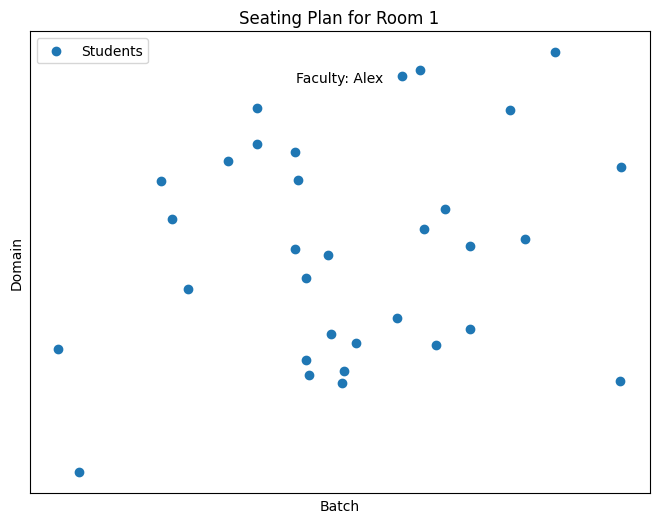

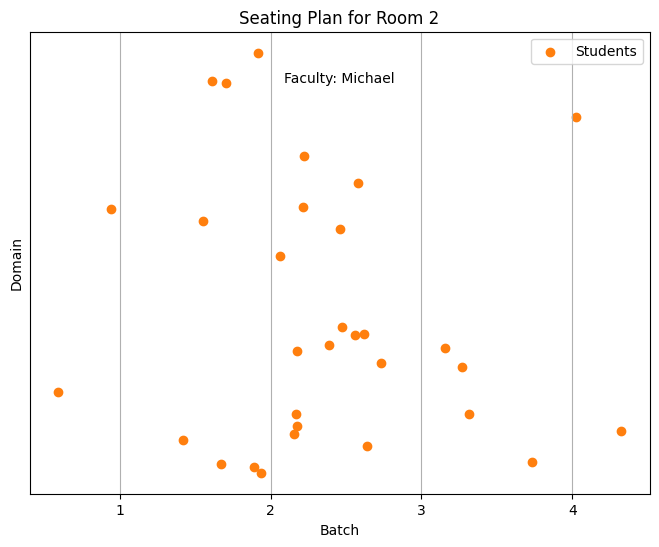

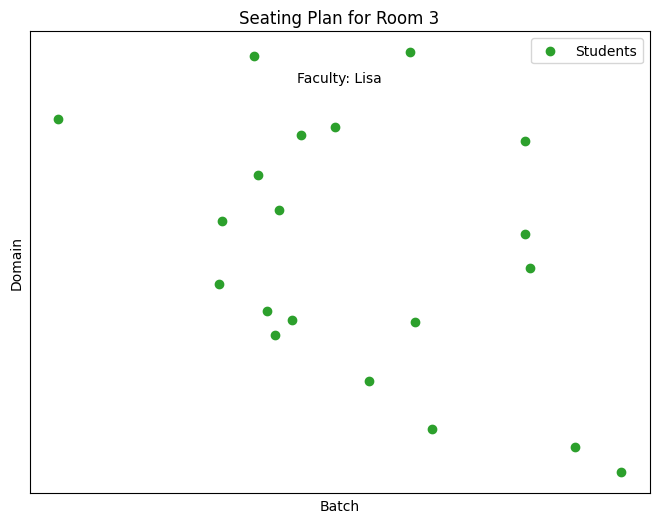

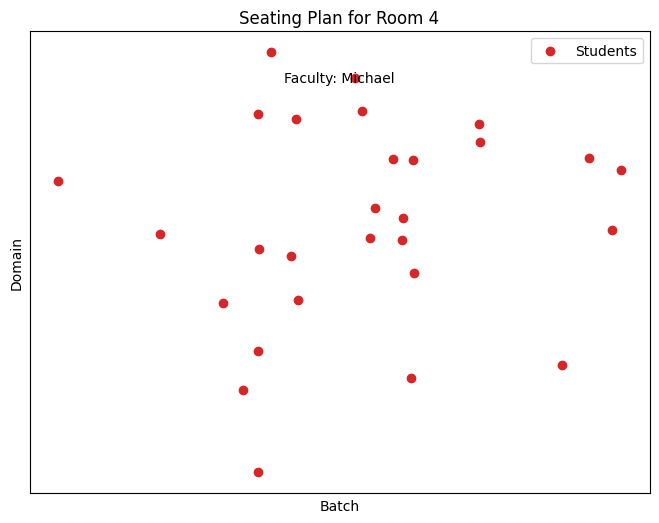

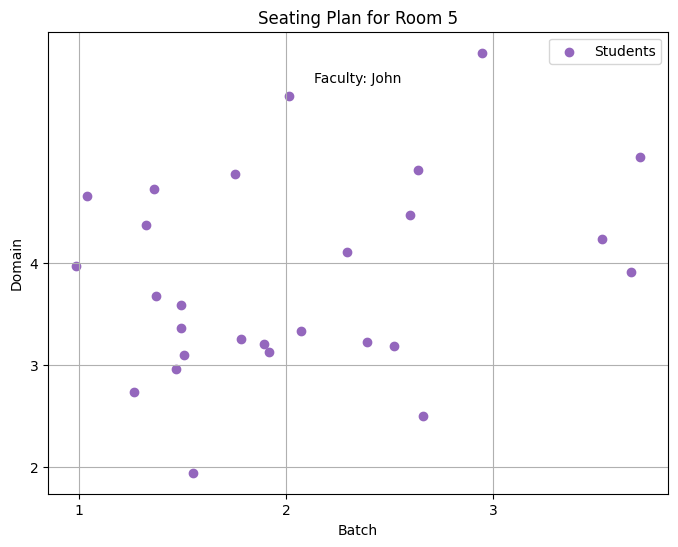

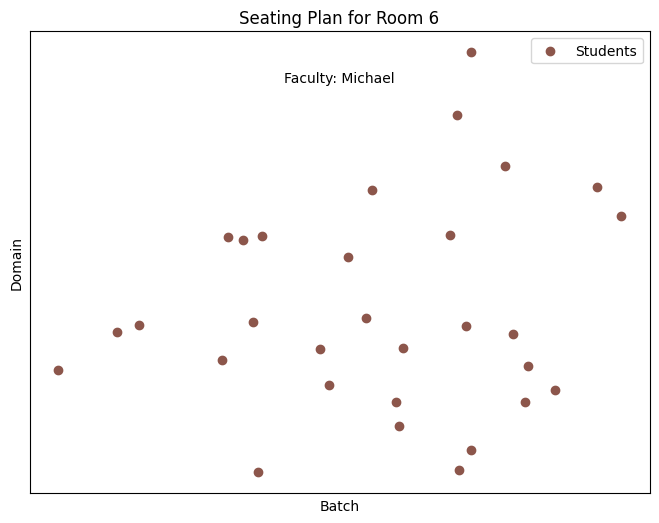

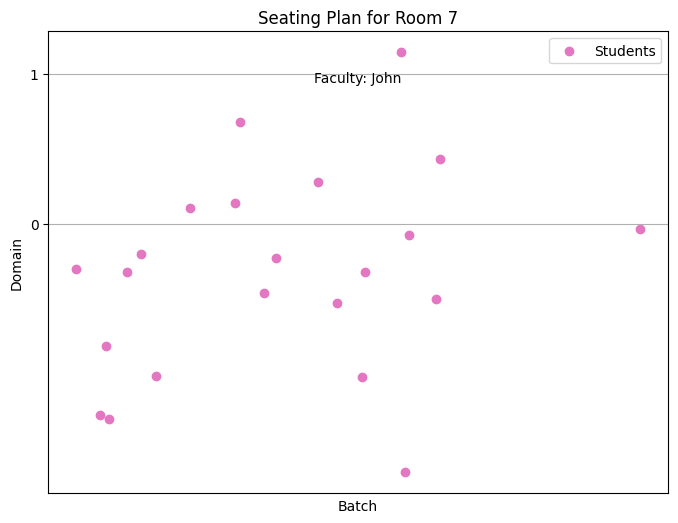

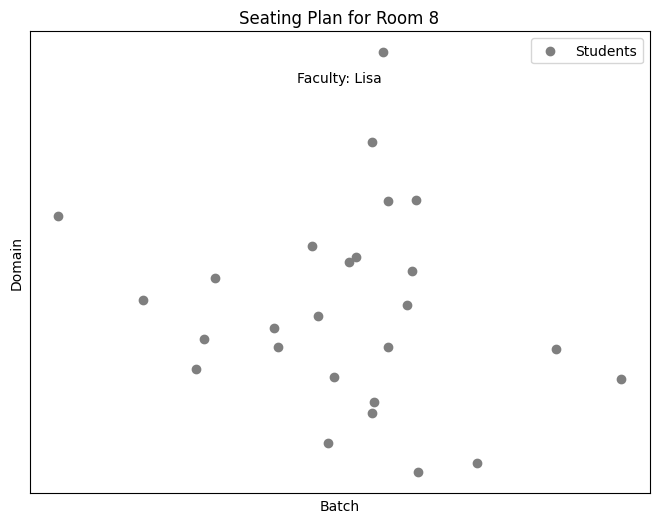

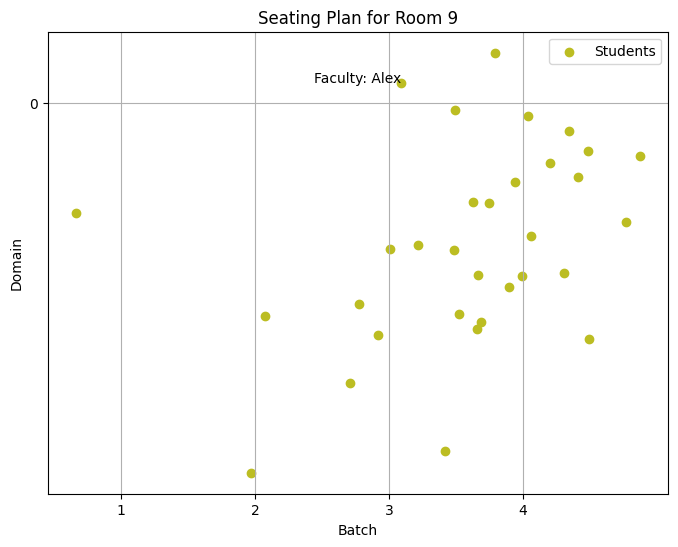

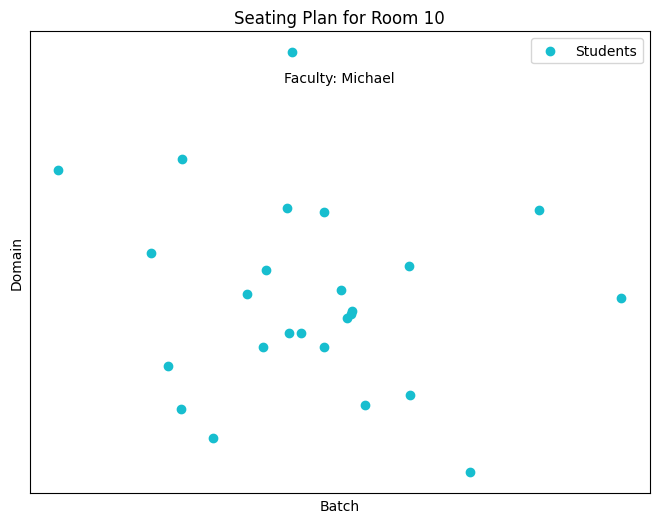

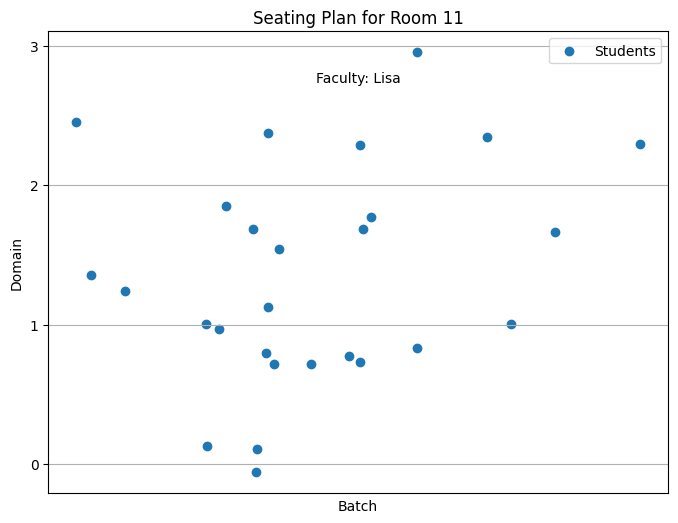

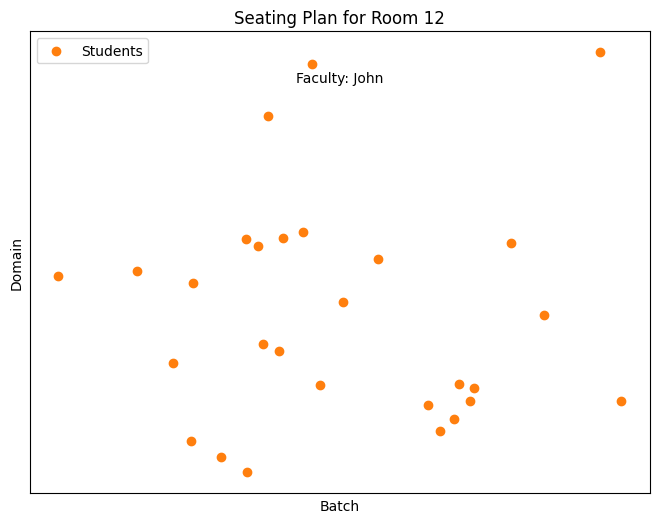

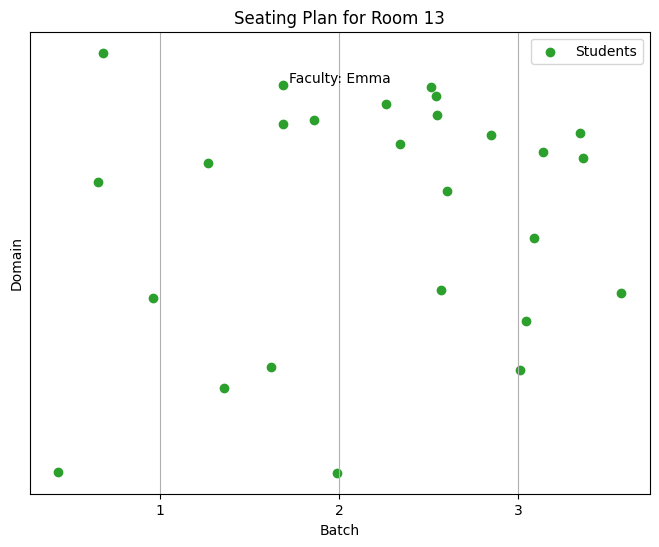

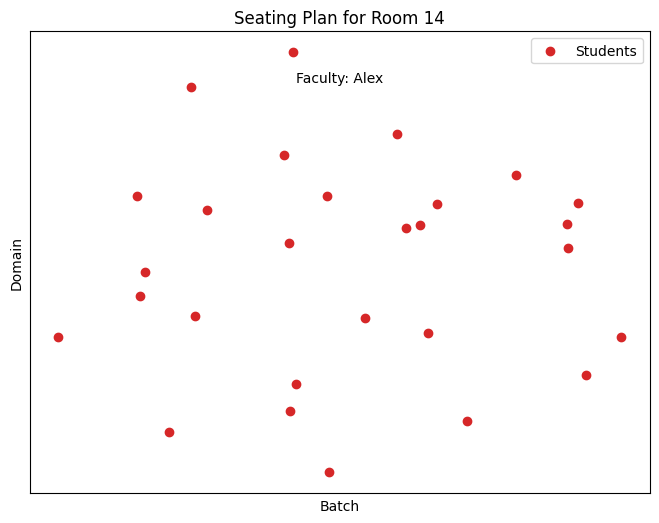

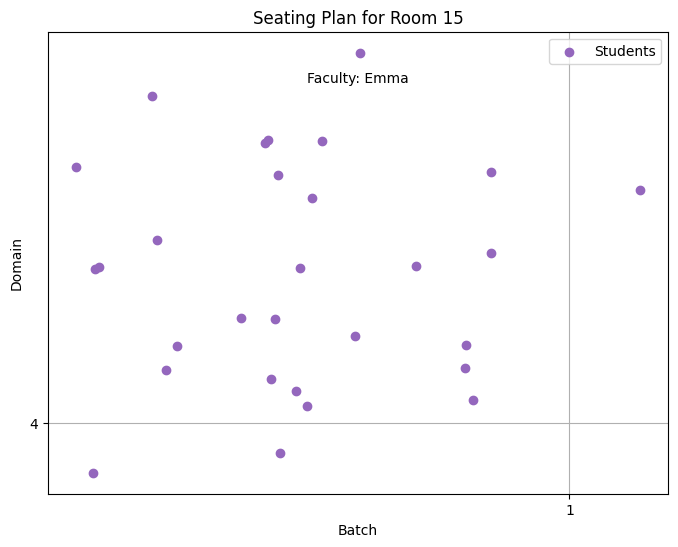

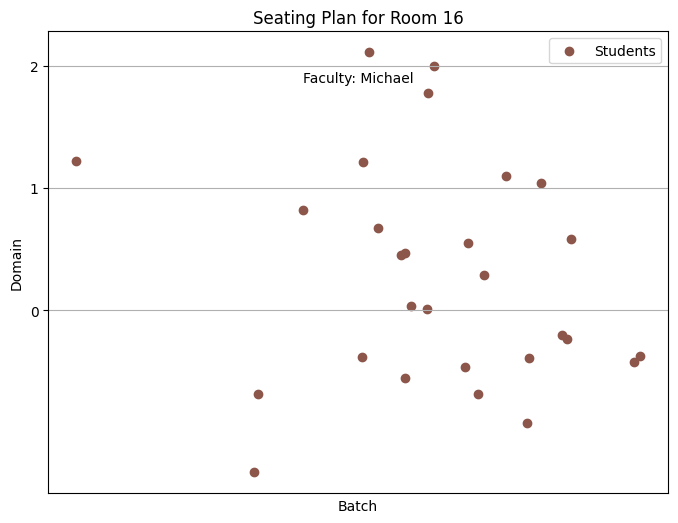

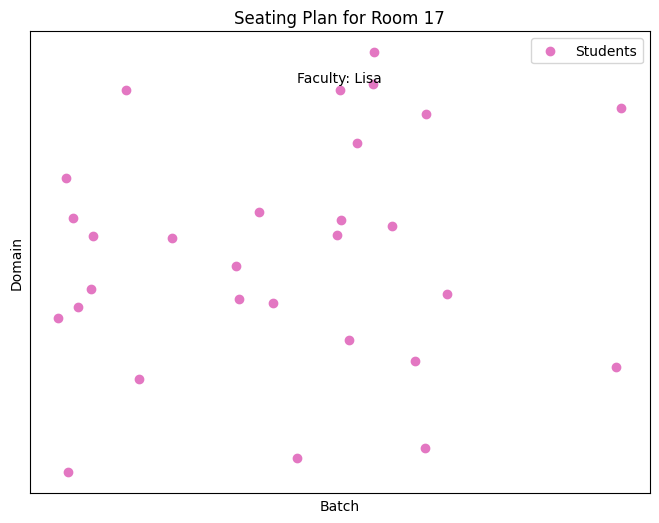

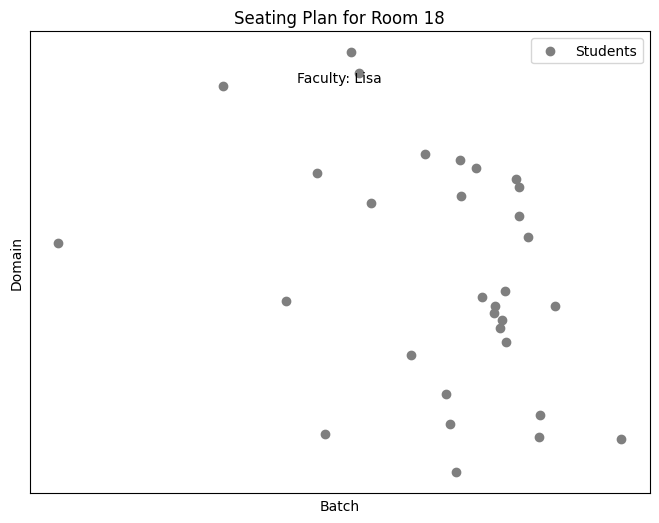

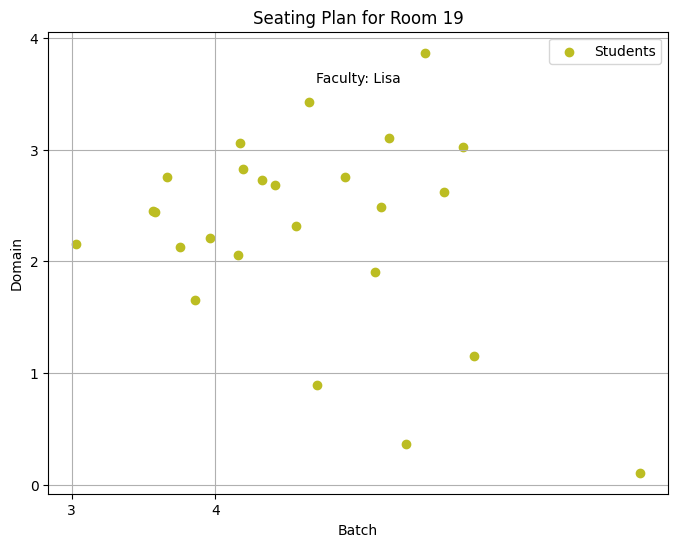

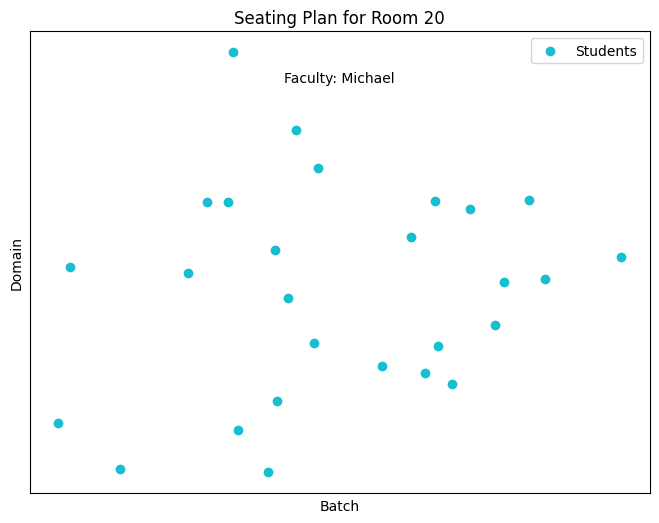

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


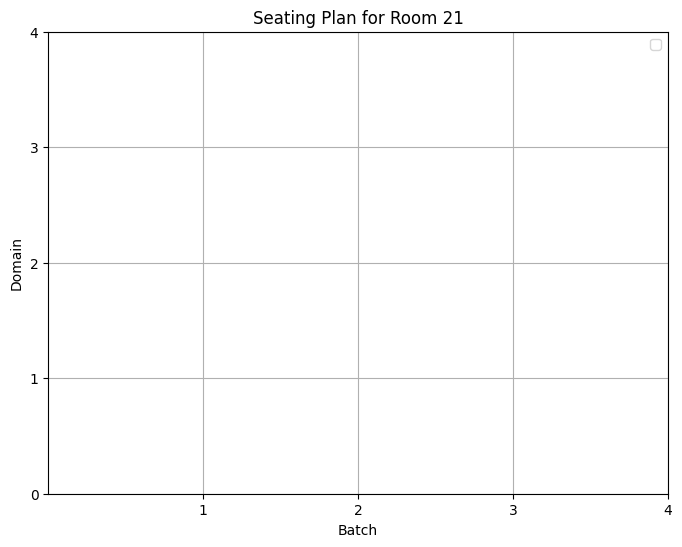

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


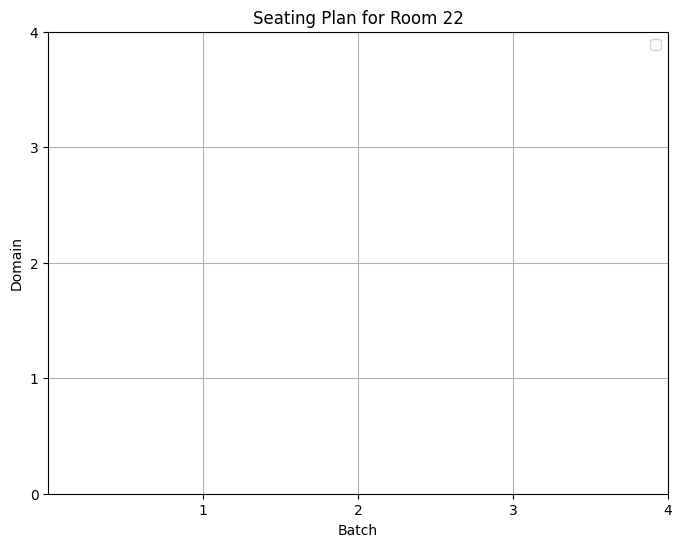

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


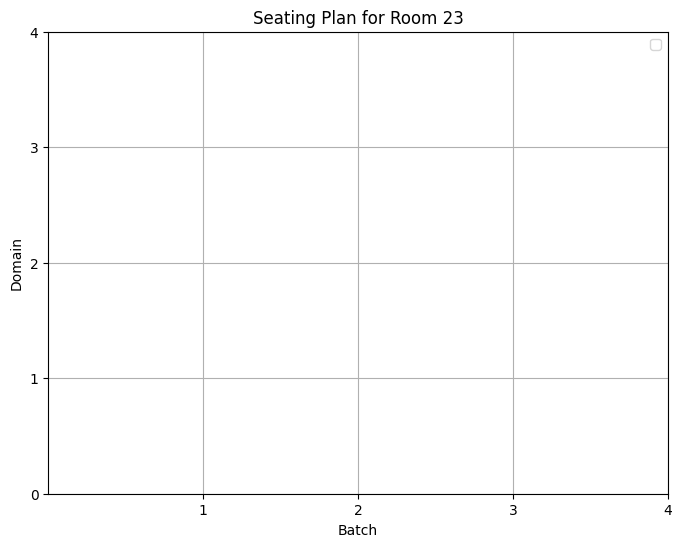

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


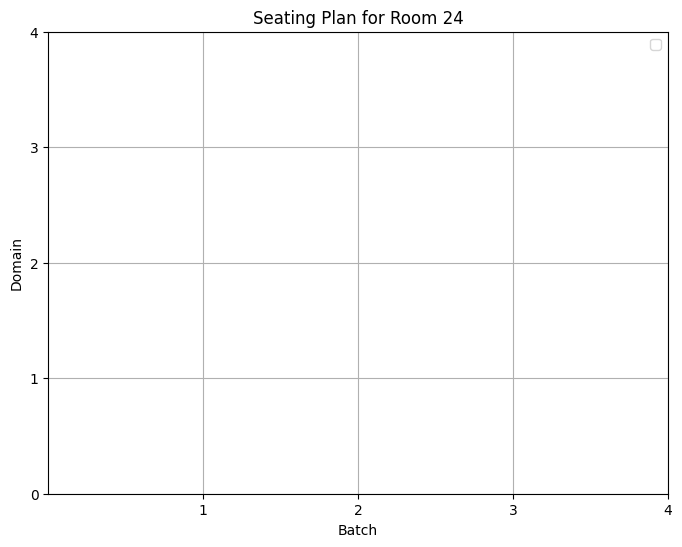

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


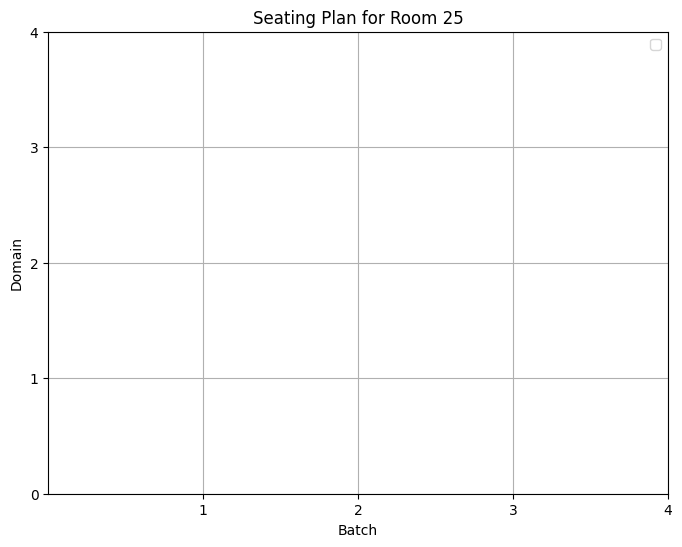

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


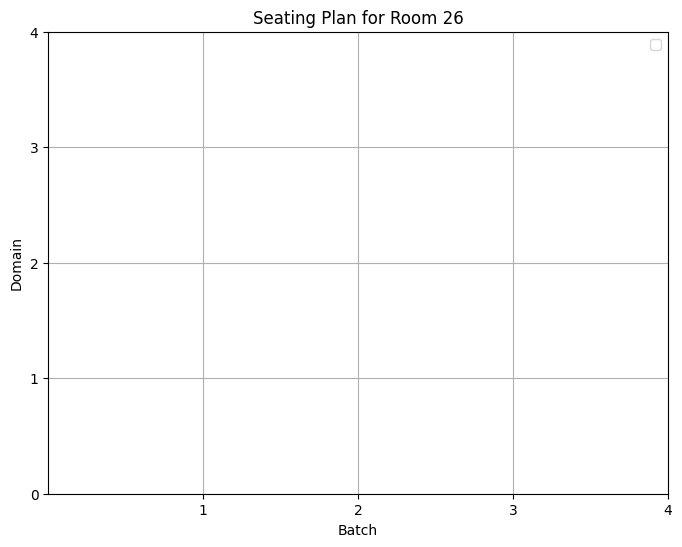

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


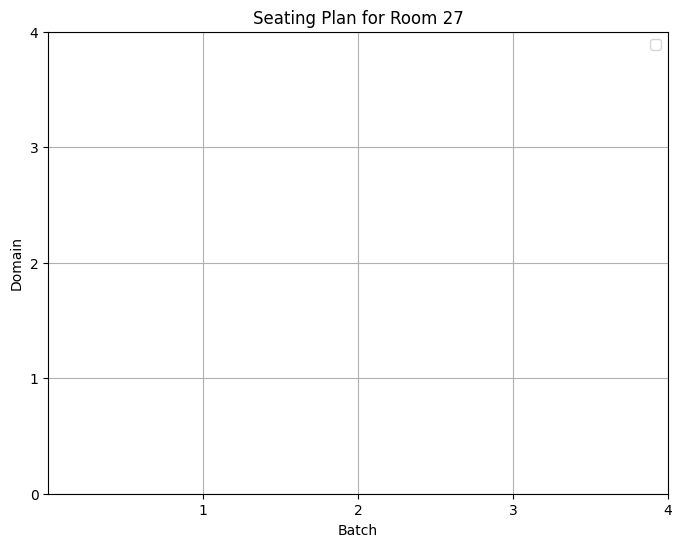

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


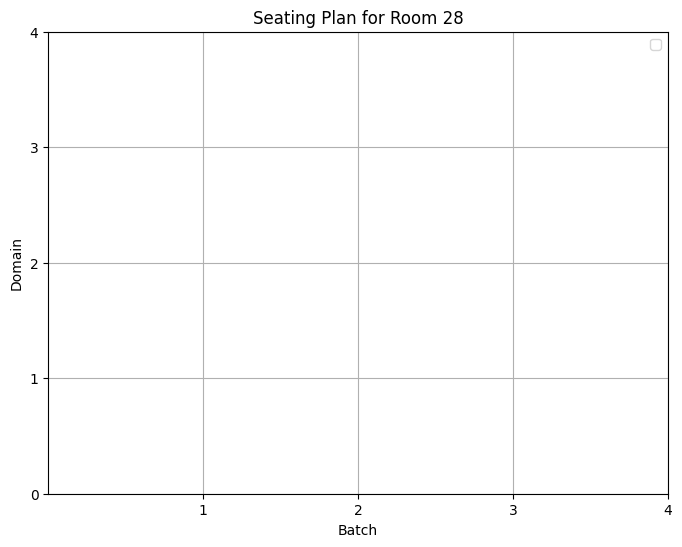

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


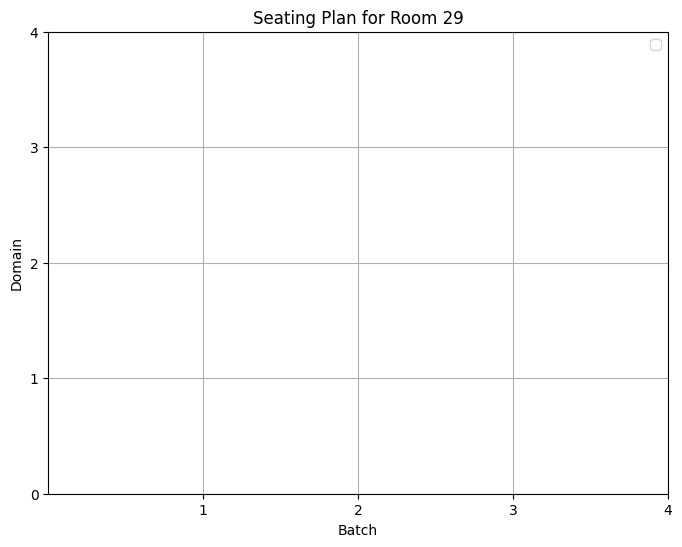

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


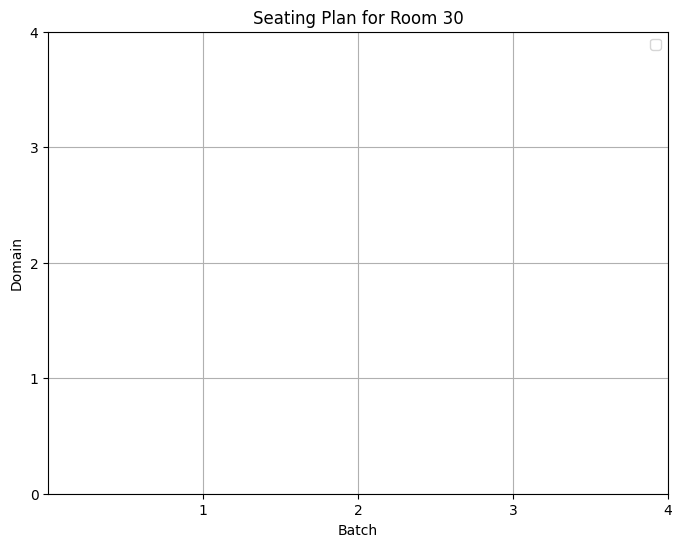

In [24]:
# Reporting
# Generate a report
def generate_report(seating_plan, faculty_allocation):
    print("Seating Plan:")
    for room, students in seating_plan.items():
        print(f"Room {room}: {students}")
    
    print("\nFaculty Allocation:")
    for room, faculties in faculty_allocation.items():
        print(f"Room {room}: {faculties}")

    # Plotting
    for room, students in seating_plan.items():
        plt.figure(figsize=(8, 6))
        plt.title(f'Seating Plan for Room {room}')
        plt.xlabel('Batch')
        plt.ylabel('Domain')
        plt.xticks(range(1, num_batches + 1))
        plt.yticks(range(num_domains))
        plt.grid(True)

        # Scatter plot for students
        for student in students:
            batch = student_data.loc[student, 'Batch']
            domain = student_data.loc[student, 'Domain_Code']
            plt.scatter(batch, domain, color=f'C{student_data.loc[student, "Cluster"]}', label='Students' if student == students[0] else None)

        # Adding faculty
        if room in faculty_allocation:
            faculty = ', '.join(faculty_allocation[room])
            plt.text(0.5, 0.9, f'Faculty: {faculty}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

        plt.legend()
        plt.show()

generate_report(seating_plan, faculty_allocation)


In [ ]:
                                        #QUESTION 04

In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Task 1: Implement Perceptron Learning Rule and Gradient Descent Delta Rule
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class GradientDescent:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def fit(self, X, y):
        self.weights = 2 * np.random.random((X.shape[1], 1)) - 1
        self.bias = 2 * np.random.random(1) - 1
        self.errors_ = []

        for _ in range(self.epochs):
            output = self.sigmoid(np.dot(X, self.weights) + self.bias)
            errors = y.reshape(-1, 1) - output
            self.weights += self.learning_rate * np.dot(X.T, errors * self.sigmoid_derivative(output))
            self.bias += self.learning_rate * np.sum(errors * self.sigmoid_derivative(output))
            self.errors_.append(np.mean(errors))
        return self

    def predict(self, X):
        return np.where(self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5, 1, 0)


In [26]:

# Task 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target



In [27]:
# Task 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [28]:
# Task 4: Instantiate and train the models
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

gradient_descent = GradientDescent()
gradient_descent.fit(X_train, y_train)



In [29]:
# Task 5: Evaluate models on test set
perceptron_accuracy = np.mean(perceptron.predict(X_test) == y_test)
gradient_descent_accuracy = np.mean(gradient_descent.predict(X_test) == y_test)



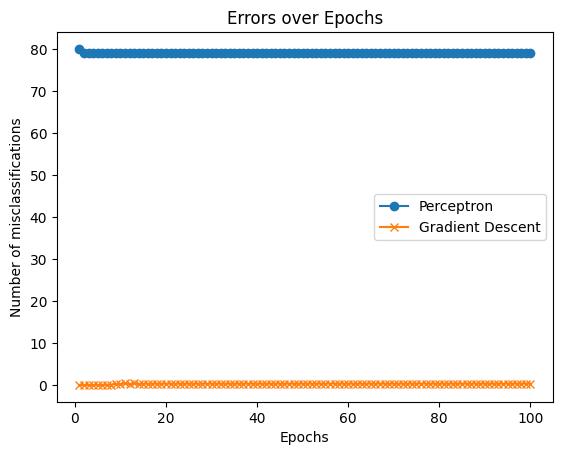

In [30]:
# Task 6: Plot the errors over epochs
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='o', label='Perceptron')
plt.plot(range(1, len(gradient_descent.errors_)+1), gradient_descent.errors_, marker='x', label='Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Errors over Epochs')
plt.legend()
plt.show()


In [31]:

# Output the results
print("\nTask 1: Perceptron Learning Rule and Gradient Descent Delta Rule Implemented")
print("Perceptron Weights:", perceptron.weights)
print("Gradient Descent Weights:", gradient_descent.weights)
print("\nTask 2: Iris dataset loaded")
print("Features (first 5 rows):\n", X[:5])
print("Targets (first 5 elements):", y[:5])
print("\nTask 3: Data split into training and testing sets (80/20)")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nTask 4: Models trained")
print("Perceptron Errors over Epochs:", perceptron.errors_)
print("Gradient Descent Errors over Epochs:", gradient_descent.errors_)
print("\nTask 5: Model accuracies on test set:")
print("Perceptron Accuracy:", perceptron_accuracy)
print("Gradient Descent Accuracy:", gradient_descent_accuracy)
print("\nTask 6: Errors over epochs plotted at the beginning")


Task 1: Perceptron Learning Rule and Gradient Descent Delta Rule Implemented
Perceptron Weights: [ -0.92   55.616 -22.118 157.46   68.234]
Gradient Descent Weights: [[ 0.02484322]
 [-1.49751655]
 [ 1.78245438]
 [ 0.62808771]]

Task 2: Iris dataset loaded
Features (first 5 rows):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets (first 5 elements): [0 0 0 0 0]

Task 3: Data split into training and testing sets (80/20)
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)

Task 4: Models trained
Perceptron Errors over Epochs: [80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,

In [ ]:
# Questions and answers (of task 4)

# 1. The key differences between the Perceptron Learning Rule and the Gradient Descent Delta Rule lie in their approaches to updating model weights during training. The Perceptron Learning Rule updates weights based on whether an instance is misclassified or not, adjusting them by a fixed learning rate times the input features. In contrast, the Gradient Descent Delta Rule updates weights using the gradient of the loss function with respect to the weights, aiming to minimize the overall loss by iteratively adjusting weights in the direction of steepest descent.

# 2. The choice of activation function can significantly influence the performance of the models. Different activation functions introduce non-linearities into the model, enabling it to learn complex patterns in the data. For example, the sigmoid activation function squashes the output between 0 and 1, making it suitable for binary classification tasks. On the other hand, the ReLU (Rectified Linear Unit) activation function is commonly used in hidden layers of neural networks, as it helps mitigate the vanishing gradient problem and accelerates convergence during training.

# 3. To adjust the learning rate for optimal model training, several strategies can be employed. One approach is to use a fixed learning rate and monitor the model's performance during training. If the model fails to converge or experiences oscillations in performance, the learning rate can be adjusted accordingly. Alternatively, adaptive learning rate methods, such as AdaGrad or RMSprop, dynamically adjust the learning rate based on the past gradients, allowing for faster convergence and better generalization.

# 4. The ratio used for splitting the dataset into training and testing sets can impact the model's performance and generalization ability. A larger training set relative to the testing set can lead to better model training and improved performance on unseen data. However, a smaller testing set may result in higher variance in the performance estimates, making it difficult to assess the model's true performance. Conversely, a larger testing set can provide more reliable estimates of model performance but may lead to underfitting if the training set is too small.

# 5. While implementing the algorithms from scratch, one challenge encountered was ensuring that the dimensions of the input data and weight matrices were compatible for matrix operations. Additionally, understanding and implementing the gradient computation for the Gradient Descent Delta Rule required careful attention to detail. To overcome these challenges, I thoroughly reviewed the mathematical formulations of the algorithms and tested the implementations with simple datasets to validate correctness.

# 6. Reflecting on the experimentation, the Perceptron Learning Rule demonstrated simplicity and efficiency in updating weights for binary classification tasks. However, it may struggle with linearly inseparable datasets and can only learn linear decision boundaries. On the other hand, the Gradient Descent Delta Rule showed superior performance in terms of flexibility and generalization, as it can learn non-linear decision boundaries and is suitable for regression tasks as well. However, it may be more computationally expensive and sensitive to hyperparameters such as learning rate and initialization.
